# View controller

View control for searchers launched in s5_embedded_trials.ipynb.

### Searcher monitoring

In [2]:
%reset -f
from search import embedded

# list active searchers
embedded.search_status(smln_id='smln_1', recent=300)

The following searchers were active in the last 300 s:


No searchers were suspended by errors.


In [3]:
# read optional error message
embedded.read_search_error(searcher_id=21)

No error found in searcher 21.


### Results scatter plot

In [4]:
%matplotlib inline
import aux
from db.d_models import EmbeddedTrial as T
from search import embedded_viz

import PARAMETERS as P
from search import embedded_global as C


pre = {
    'w_n_pc_ec_vs_dist': aux.load(C.PATH_W_N_PC_EC_VS_DIST),
    'v_g_n_vs_w_n_pc_ec_fr_ec': aux.load(C.PATH_V_G_N_VS_W_N_PC_EC_FR_EC)
}

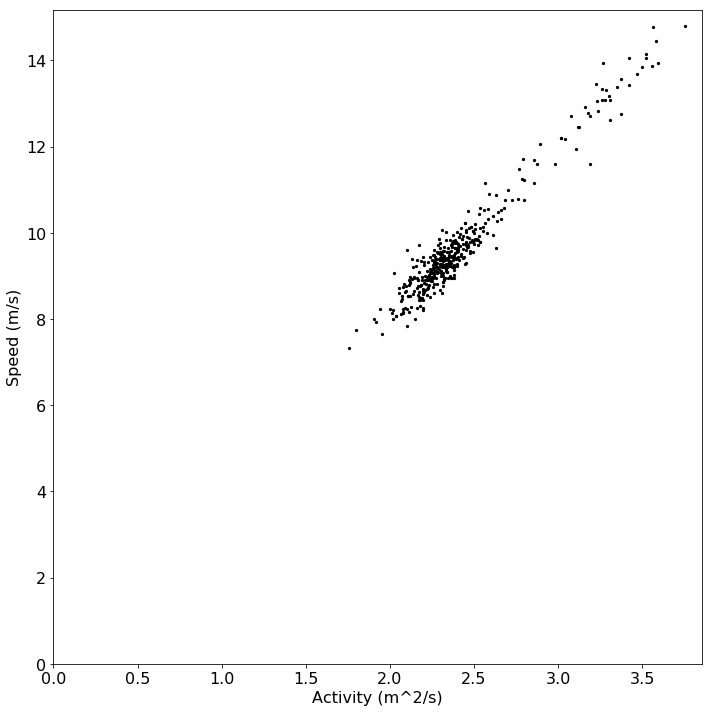

In [5]:
embedded_viz.rslt_scatter(
    smln_id='smln_1',
    filt=[T.stability > 0, T.speed < 15, T.activity < 10],
    lmt=10000, c='k', s=5, alpha=1);

### Fast trial lookup

In [32]:
embedded_viz.select_trials(
    smln_id='smln_1',
    filt=[T.stability > 0], order_by='speed', lmt=50
    )[[
        'id', 'stability', 'angle', 'speed', 'p_inh', 'rho_pc', 'z_pc', 'l_pc', 'w_a_pc_pc', 'p_a_inh_pc',
        'w_a_inh_pc', 'p_g_pc_inh', 'w_g_pc_inh', 'fr_ec'
    ]]

,id,stability,angle,speed,p_inh,rho_pc,z_pc,l_pc,w_a_pc_pc,p_a_inh_pc,w_a_inh_pc,p_g_pc_inh,w_g_pc_inh,fr_ec
0,20260,0.333333,94.916633,2.905878,0.111703,12620.569167,1.085741,0.041573,0.010752,0.085773,0.002078,0.020980,0.011215,39.533506
1,17213,0.333333,-0.109359,7.322632,0.077880,11629.422873,1.096032,0.020566,0.008713,0.079549,0.004566,0.019784,0.001092,35.795759
2,16800,0.333333,-0.352007,7.659139,0.064119,11823.951171,1.092505,0.021943,0.007065,0.076438,0.004257,0.040000,0.005398,40.240338
3,19249,0.333333,0.488166,7.751377,0.079737,12232.697401,0.873662,0.025652,0.006610,0.095578,0.003067,0.005790,0.012215,36.317136
4,18213,0.333333,0.507654,7.839300,0.063030,11829.084686,1.098692,0.021742,0.007167,0.076505,0.004214,0.039922,0.005369,40.291344
5,16955,0.333333,-0.351930,7.923479,0.064201,11825.024659,1.091818,0.021978,0.007044,0.076511,0.004270,0.040000,0.005397,40.239286
6,19637,0.333333,-0.065328,8.000421,0.062636,11878.118625,1.100682,0.021811,0.007235,0.076647,0.004136,0.039721,0.005271,40.233728
7,20952,0.333333,0.462021,8.002207,0.063771,11893.106785,1.095992,0.022064,0.007264,0.076741,0.004097,0.040000,0.005304,40.189812
8,19225,0.333333,1.291238,8.007613,0.062833,11842.587091,1.101300,0.021594,0.007264,0.076875,0.004120,0.039709,0.005275,40.224177
9,18008,0.333333,0.365824,8.058819,0.063549,11833.647260,1.096772,0.021836,0.007127,0.076743,0.004238,0.039991,0.005373,40.185213


### Example trials

### SMLN 1

RSLTS:
{'STABILITY': 0.33333333333333331, 'ANGLE': -0.95381485539970889, 'ACTIVITY': 2.2546126758806517, 'SPEED': 8.748003857747209}


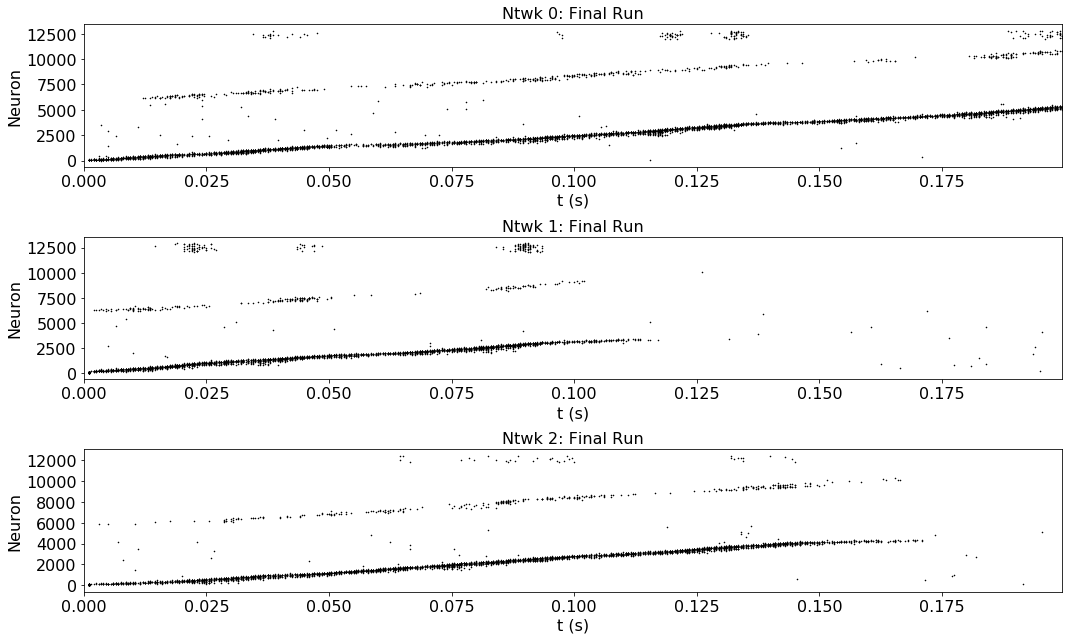

In [7]:
embedded_viz.raster(16515, pre, C, P, ax_height=3, c='k', marker='.', lw=0, s=10);

In [21]:
embedded_viz.print_trial(16515)

TRIAL 16515

SEED = 2286

PARAMS:
{'AREA_H': 0.5,
 'AREA_W': 2.0,
 'FR_EC': 40.2451189419925,
 'L_PC': 0.022084438481328,
 'P_A_INH_PC': 0.0763973443128726,
 'P_G_PC_INH': 0.03,
 'P_INH': 0.0641836708123343,
 'RHO_PC': 11824.9642481499,
 'RIDGE_Y': -0.125,
 'W_A_INH_PC': 0.00425471095406588,
 'W_A_PC_PC': 0.00705595038460935,
 'W_G_PC_INH': 0.0054351697,
 'Z_PC': 1.0936823903124}

RSLTS:
{'ACTIVITY': 2.25461267588065,
 'ANGLE': -0.953814855399709,
 'SPEED': 8.74800385774721,
 'STABILITY': 0.333333333333333}


RSLTS:
{'STABILITY': 0.66666666666666663, 'ANGLE': 0.24754040548792955, 'ACTIVITY': 2.6291257054266279, 'SPEED': 10.883231571408379}


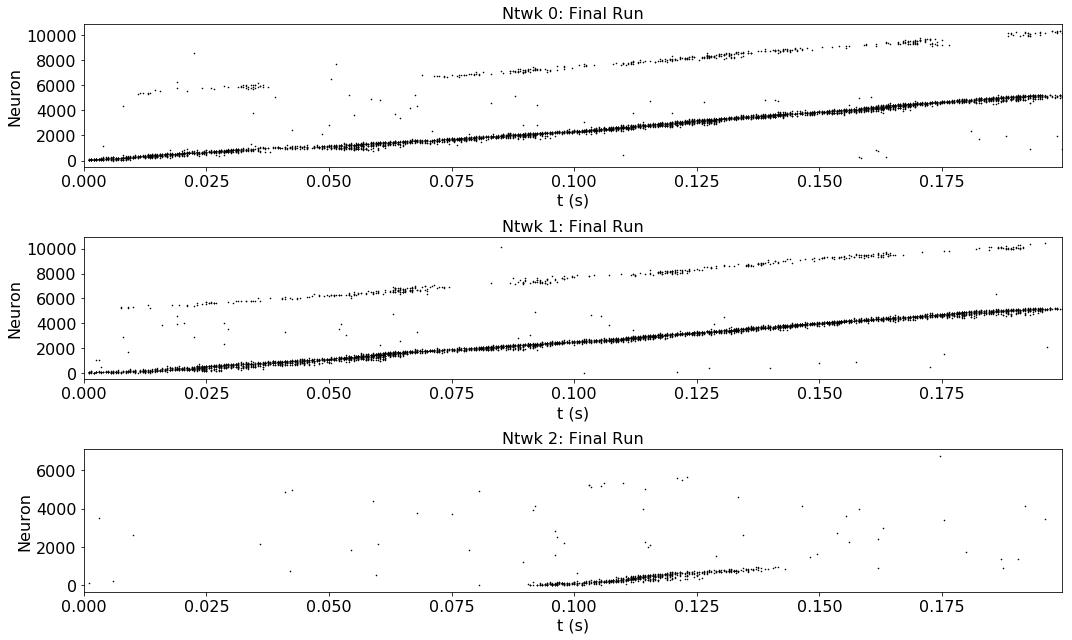

In [10]:
embedded_viz.raster(16517, pre, C, P, ax_height=3, c='k', marker='.', lw=0, s=10);

In [22]:
embedded_viz.print_trial(16517)

TRIAL 16517

SEED = 3050

PARAMS:
{'AREA_H': 0.5,
 'AREA_W': 2.0,
 'FR_EC': 41.1618320914401,
 'L_PC': 0.0262400374450918,
 'P_A_INH_PC': 0.0873150956083927,
 'P_G_PC_INH': 0.0137217034829851,
 'P_INH': 0.118530941344602,
 'RHO_PC': 10588.0101295135,
 'RIDGE_Y': -0.125,
 'W_A_INH_PC': 0.00212093876944484,
 'W_A_PC_PC': 0.00683346136610389,
 'W_G_PC_INH': 0.0108083803733792,
 'Z_PC': 0.855577676548951}

RSLTS:
{'ACTIVITY': 2.62912570542662,
 'ANGLE': 0.24754040548793,
 'SPEED': 10.8832315714084,
 'STABILITY': 0.666666666666667}


RSLTS:
{'STABILITY': 0.33333333333333331, 'ANGLE': -0.17447643915433575, 'ACTIVITY': 2.3326151778355309, 'SPEED': 9.2768437070404985}


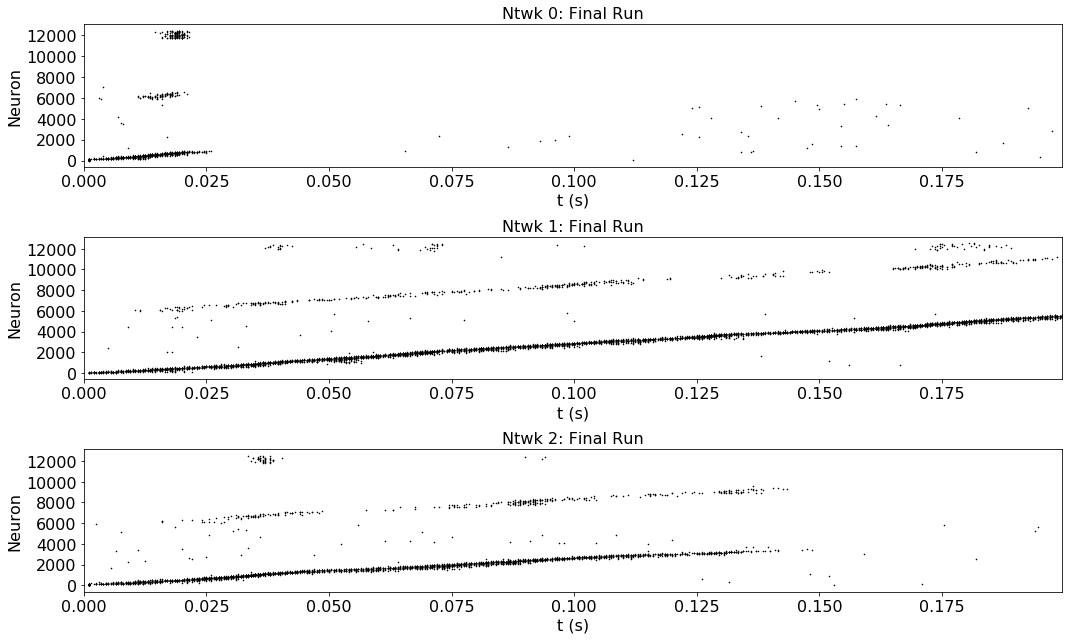

In [14]:
embedded_viz.raster(16556, pre, C, P, ax_height=3, c='k', marker='.', lw=0, s=10);

In [23]:
embedded_viz.print_trial(16556)

TRIAL 16556

SEED = 8996

PARAMS:
{'AREA_H': 0.5,
 'AREA_W': 2.0,
 'FR_EC': 40.2466708085049,
 'L_PC': 0.0220776879216453,
 'P_A_INH_PC': 0.0764091395591711,
 'P_G_PC_INH': 0.03,
 'P_INH': 0.0641328041941998,
 'RHO_PC': 11823.6122126527,
 'RIDGE_Y': -0.125,
 'W_A_INH_PC': 0.00425579923099409,
 'W_A_PC_PC': 0.00705796311235092,
 'W_G_PC_INH': 0.00544121088063469,
 'Z_PC': 1.09372475120049}

RSLTS:
{'ACTIVITY': 2.33261517783552,
 'ANGLE': -0.174476439154336,
 'SPEED': 9.2768437070405,
 'STABILITY': 0.333333333333333}


RSLTS:
{'STABILITY': 0.33333333333333331, 'ANGLE': -0.16917026288527359, 'ACTIVITY': 2.2497769493606401, 'SPEED': 8.9848062277672405}


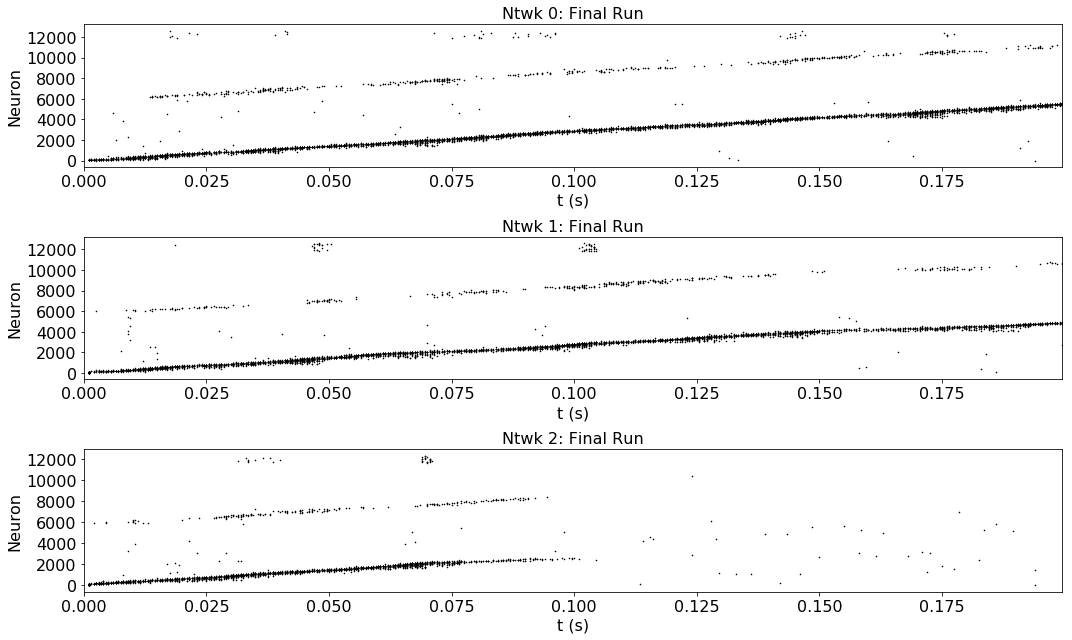

In [19]:
embedded_viz.raster(16717, pre, C, P, ax_height=3, c='k', marker='.', lw=0, s=10);

In [24]:
embedded_viz.print_trial(16717)

TRIAL 16717

SEED = 4690

PARAMS:
{'AREA_H': 0.5,
 'AREA_W': 2.0,
 'FR_EC': 40.2567022323602,
 'L_PC': 0.0219690048229608,
 'P_A_INH_PC': 0.0764178291617315,
 'P_G_PC_INH': 0.0399489616910293,
 'P_INH': 0.0641341160267244,
 'RHO_PC': 11828.9504244245,
 'RIDGE_Y': -0.125,
 'W_A_INH_PC': 0.00427304004391711,
 'W_A_PC_PC': 0.0070640026052003,
 'W_G_PC_INH': 0.0054322782163181,
 'Z_PC': 1.0930518901499}

RSLTS:
{'ACTIVITY': 2.24977694936064,
 'ANGLE': -0.169170262885274,
 'SPEED': 8.98480622776724,
 'STABILITY': 0.333333333333333}


RSLTS:
{'STABILITY': 1.0, 'ANGLE': 0.26286692150994262, 'ACTIVITY': 2.7035641005745101, 'SPEED': 10.986904367137916}


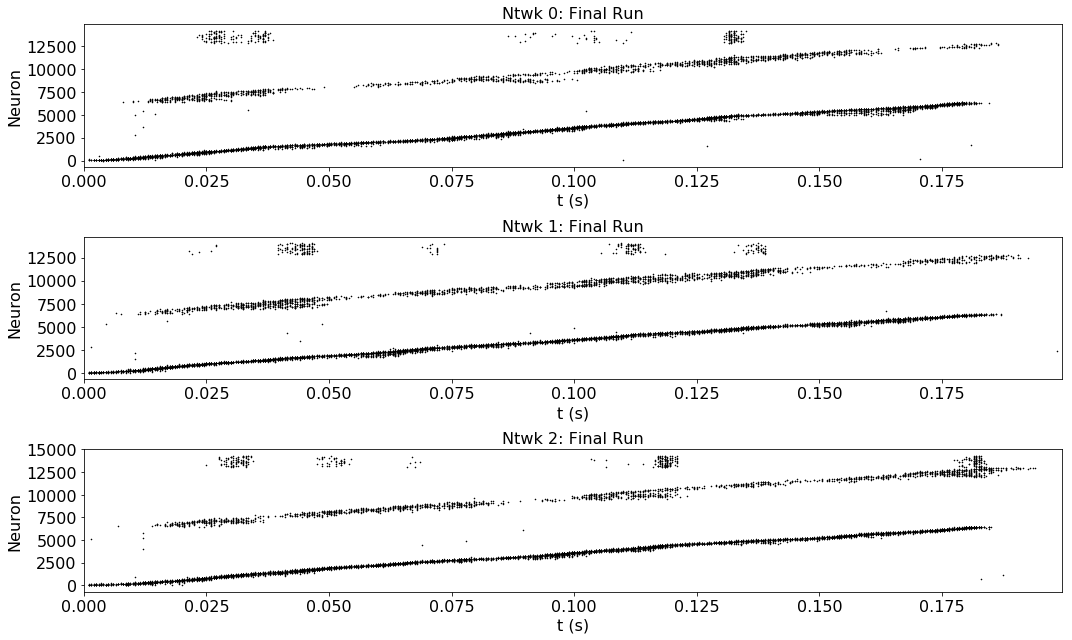

In [17]:
embedded_viz.raster(16544, pre, C, P, ax_height=3, c='k', marker='.', lw=0, s=10);

In [6]:
embedded_viz.print_trial(16544)

TRIAL 16544

SEED = 2072

PARAMS:
{'AREA_H': 0.5,
 'AREA_W': 2.0,
 'FR_EC': 36.0486020239931,
 'L_PC': 0.0229752508114818,
 'P_A_INH_PC': 0.0835630470957467,
 'P_G_PC_INH': 0.00809806211474834,
 'P_INH': 0.100022290298044,
 'RHO_PC': 12830.618975583,
 'RIDGE_Y': -0.125,
 'W_A_INH_PC': 0.00278646588985677,
 'W_A_PC_PC': 0.00827795594010563,
 'W_G_PC_INH': 0.0143487631414606,
 'Z_PC': 1.00385437210806}

RSLTS:
{'ACTIVITY': 2.70356410057451,
 'ANGLE': 0.262866921509943,
 'SPEED': 10.9869043671379,
 'STABILITY': 1.0}


### SMLN 0

RSLTS:
{'STABILITY': 0.33333333333333331, 'ANGLE': 0.16035315907706041, 'ACTIVITY': 2.2071948339364775, 'SPEED': 8.7040956871546982}


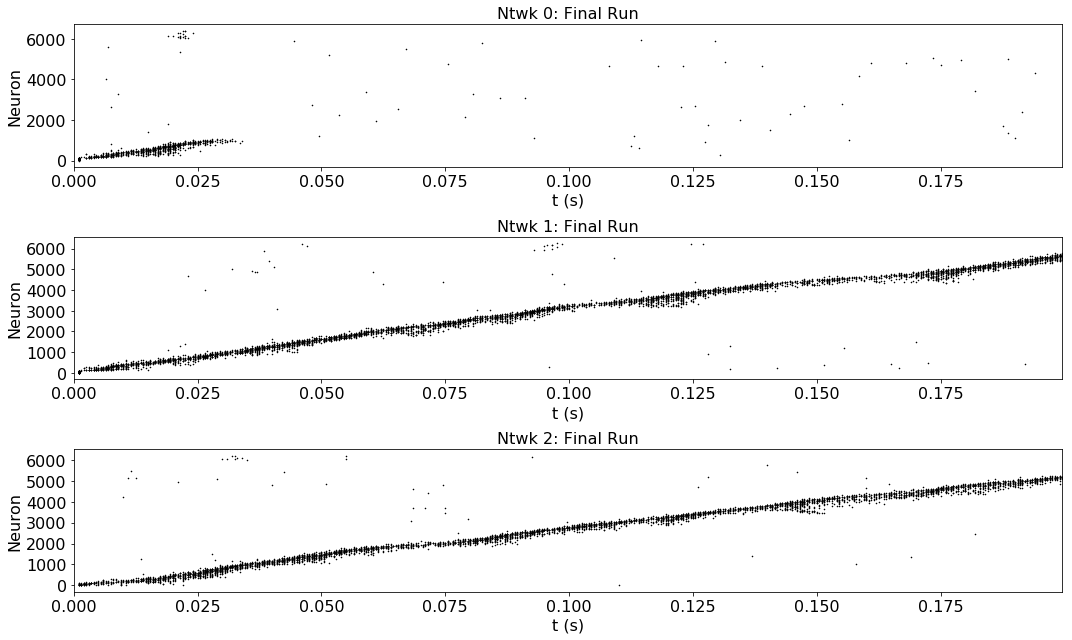

In [11]:
embedded_viz.raster(14388, pre, C, P, ax_height=3, c='k', marker='.', lw=0, s=10);

In [15]:
embedded_viz.print_trial(14388)

TRIAL 14388

SEED = 1224

PARAMS:
{'AREA_H': 0.25,
 'AREA_W': 2.0,
 'FR_EC': 40.2451189419925,
 'L_PC': 0.022084438481328,
 'P_A_INH_PC': 0.0763973443128726,
 'P_G_PC_INH': 0.057866998281167,
 'P_INH': 0.0641836708123343,
 'RHO_PC': 11824.9642481499,
 'RIDGE_Y': 0.0,
 'W_A_INH_PC': 0.00425471095406588,
 'W_A_PC_PC': 0.00705595038460935,
 'W_G_PC_INH': 0.010870339483104,
 'Z_PC': 1.0936823903124}

RSLTS:
{'ACTIVITY': 2.20719483393649,
 'ANGLE': 0.16035315907706,
 'SPEED': 8.7040956871547,
 'STABILITY': 0.333333333333333}
